In [1]:
import pandas as pd
df = pd.read_csv('c:/data/dacon/card.csv')

In [2]:
df

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200104,1174066000,성내3동,7041,약국,463,5843230
1,20200104,1174066000,성내3동,7022,치과의원,33,7835550
2,20200104,1174066000,성내3동,7021,한의원,53,4589800
3,20200104,1174066000,성내3동,7020,의원,339,9267240
4,20200104,1174066000,성내3동,6110,자동차정비,19,4441000
...,...,...,...,...,...,...,...
3777642,20200614,1121586000,구의2동,4004,대형할인점,136,1195640
3777643,20200614,1121584700,자양4동,9010,인테 리어,2,13100
3777644,20200614,1162052500,보라매동,6140,주 차 장,2,14500
3777645,20200614,1135056000,월계1동,9998,기타전문점,1,38000


In [3]:
sj = df[df['selng_cascnt']=='석재'].index
ct = df[df['selng_cascnt']=='커텐'].index
ys = df[df['selng_cascnt']=='영상물'].index
bj = df[df['selng_cascnt']=='복지매장'].index
ch = df[df['selng_cascnt']=='축협직영매장'].index

df_mod1 = df.drop(sj)
df_mod2 = df_mod1.drop(ct)
df_mod3 = df_mod2.drop(ys)
df_mod4 = df_mod3.drop(bj)
df_mod5 = df_mod4.drop(ch)

In [4]:
df_mod5['selng_cascnt_int'] = pd.to_numeric(df_mod5['selng_cascnt'])
df_mod5

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt,selng_cascnt_int
0,20200104,1174066000,성내3동,7041,약국,463,5843230,463
1,20200104,1174066000,성내3동,7022,치과의원,33,7835550,33
2,20200104,1174066000,성내3동,7021,한의원,53,4589800,53
3,20200104,1174066000,성내3동,7020,의원,339,9267240,339
4,20200104,1174066000,성내3동,6110,자동차정비,19,4441000,19
...,...,...,...,...,...,...,...,...
3777642,20200614,1121586000,구의2동,4004,대형할인점,136,1195640,136
3777643,20200614,1121584700,자양4동,9010,인테 리어,2,13100,2
3777644,20200614,1162052500,보라매동,6140,주 차 장,2,14500,2
3777645,20200614,1135056000,월계1동,9998,기타전문점,1,38000,1


In [5]:
df_mod5['receipt_dttm'] = df_mod5['receipt_dttm'].astype(str)
df_mod5['date']=df_mod5['receipt_dttm'].str[0:4]+"-"+df_mod5["receipt_dttm"].str[4:6]+"-"+df_mod5["receipt_dttm"].str[6:8]
df_mod5['date']=df_mod5['date'].astype('datetime64[ns]')
df_mod5

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt,selng_cascnt_int,date
0,20200104,1174066000,성내3동,7041,약국,463,5843230,463,2020-01-04
1,20200104,1174066000,성내3동,7022,치과의원,33,7835550,33,2020-01-04
2,20200104,1174066000,성내3동,7021,한의원,53,4589800,53,2020-01-04
3,20200104,1174066000,성내3동,7020,의원,339,9267240,339,2020-01-04
4,20200104,1174066000,성내3동,6110,자동차정비,19,4441000,19,2020-01-04
...,...,...,...,...,...,...,...,...,...
3777642,20200614,1121586000,구의2동,4004,대형할인점,136,1195640,136,2020-06-14
3777643,20200614,1121584700,자양4동,9010,인테 리어,2,13100,2,2020-06-14
3777644,20200614,1162052500,보라매동,6140,주 차 장,2,14500,2,2020-06-14
3777645,20200614,1135056000,월계1동,9998,기타전문점,1,38000,1,2020-06-14


In [6]:
pd.DataFrame(df_mod5['selng_cascnt_int'].groupby(df_mod5['date']).sum())
#날짜별 매출건수
# 1월4일 ~ 6월 14일 원래는 163일
# 2월4일, 2월7일~13일 -> 8일이 비어있음

,selng_cascnt_int
date,
2020-01-04,3485355
2020-01-05,2748290
2020-01-06,3911133
2020-01-07,4196355
2020-01-08,3966219
...,...
2020-06-10,7114065
2020-06-11,6495485
2020-06-12,6544058


# 전체 매출건수 경향

C:\Users\analysis\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


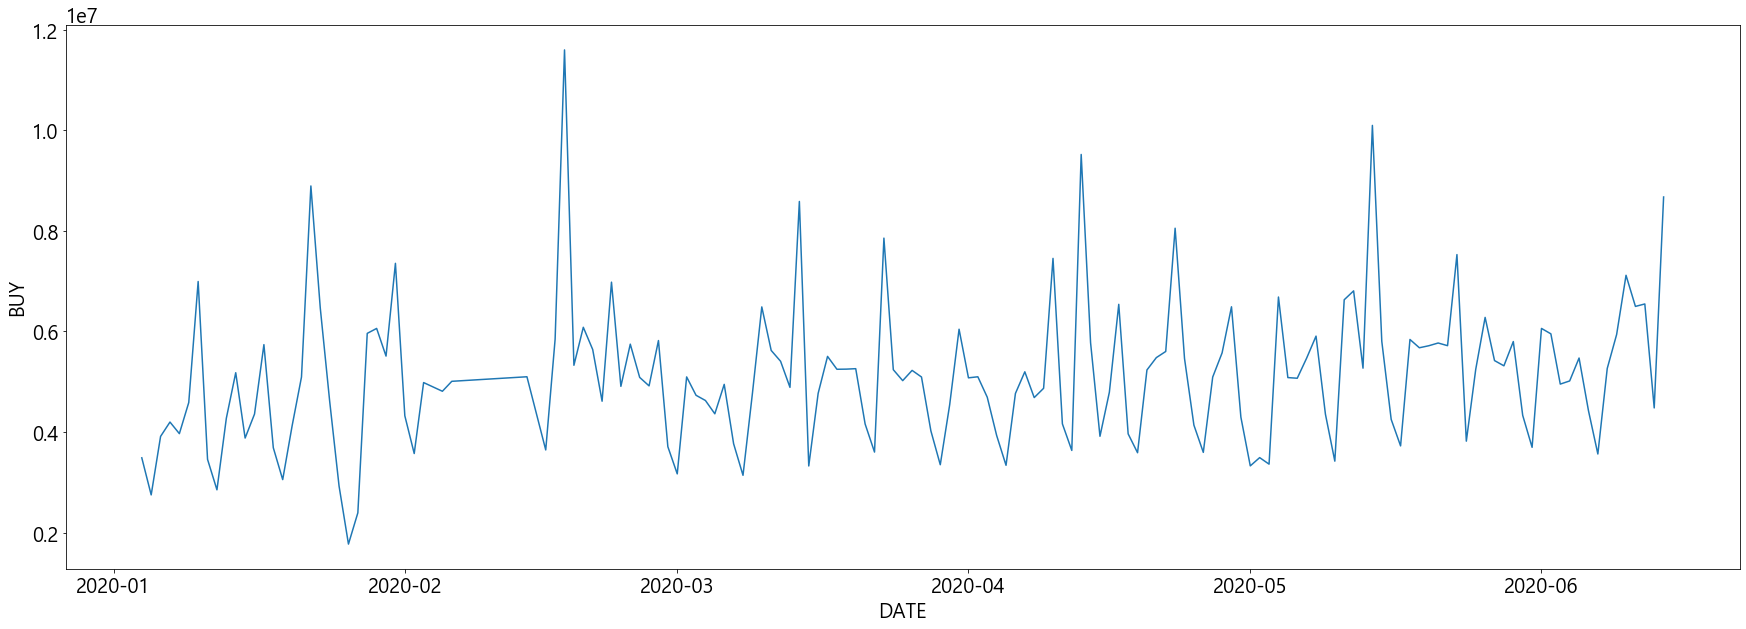

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name, size = 20)
plt.figure(figsize=(30,10))
plt.plot(pd.DataFrame(df_mod5['selng_cascnt_int'].groupby(df_mod5['date']).sum()))
plt.xlabel('DATE')
plt.ylabel('BUY')
plt.show()

In [8]:
def buy_graph(df):
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name, size = 20)
    plt.figure(figsize=(30,10))
    plt.plot(pd.DataFrame(df['selng_cascnt_int'].groupby(df['date']).sum()))
    plt.xlabel('DATE')
    plt.ylabel('BUY')
    plt.show()

# 9가지 대분류별 그래프

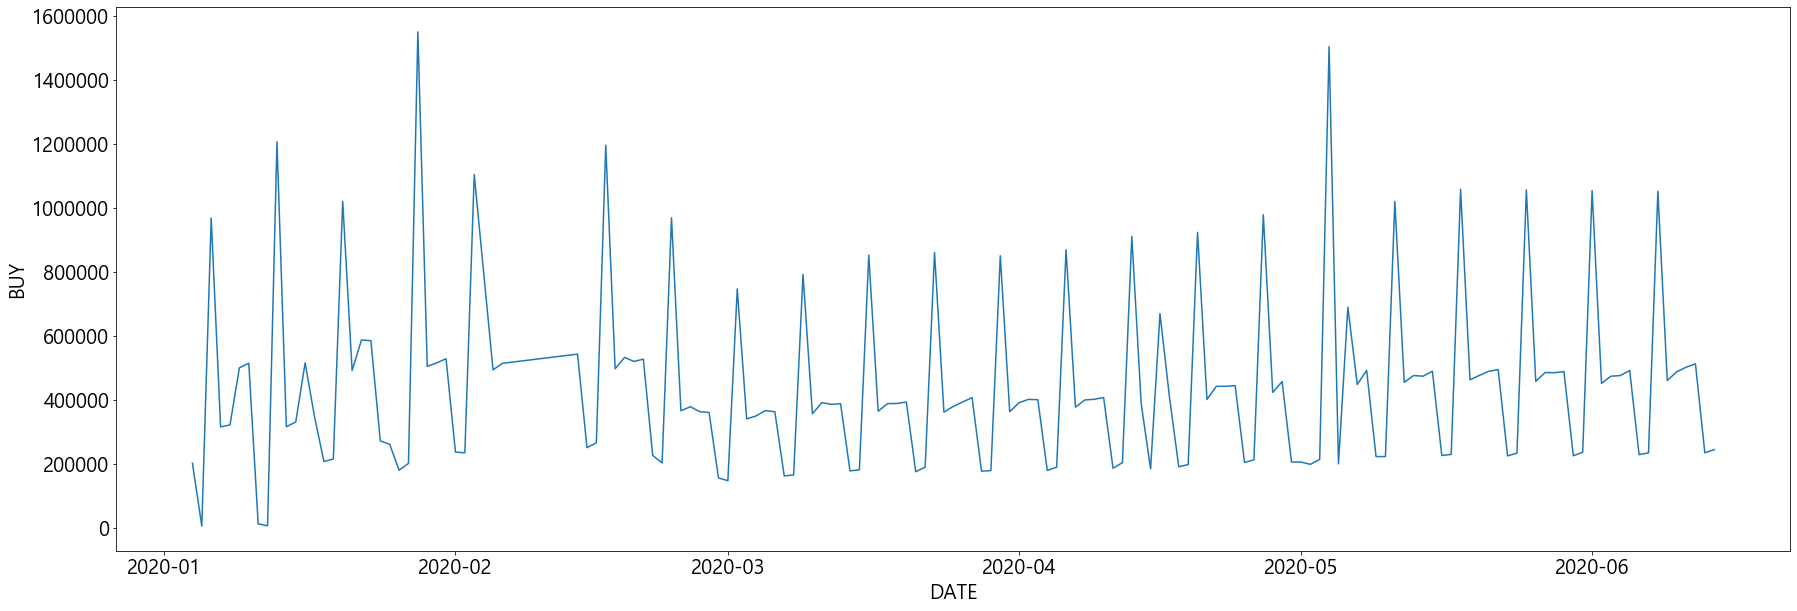

In [29]:
con1 = df_mod5['mrhst_induty_cl_code']//100 == 10 #기타숙박업, 특급 호텔, 2급 호텔, 1급 호텔, 콘   도
con2 = df_mod5['mrhst_induty_cl_code']//100 == 11 #렌트카, 광관여행, 택시, 항공사, 고속버스, 기타교통수당, 여객선, 철도, 택시회사
df1 = df_mod5[con1 | con2]
buy_graph(df1)

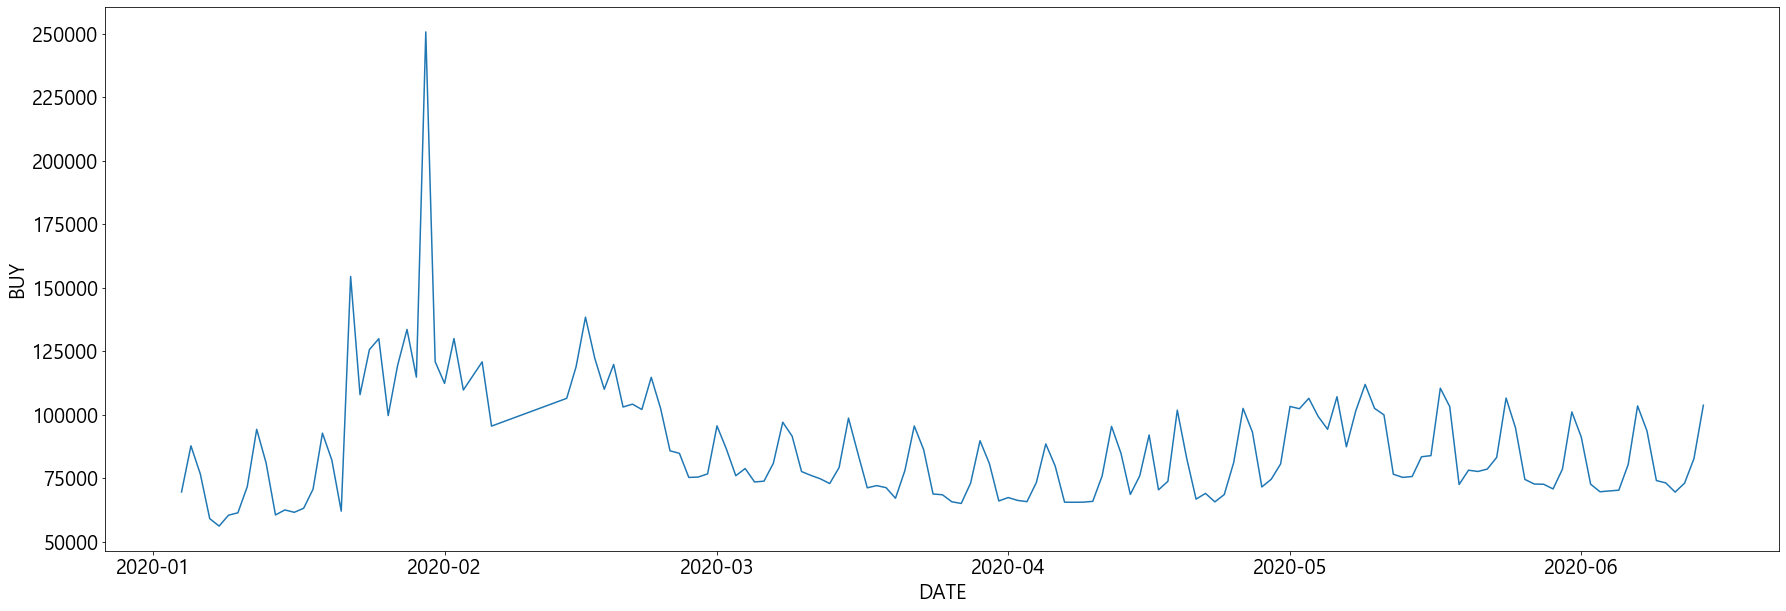

In [32]:
con1 = df_mod5['mrhst_induty_cl_code']//100 == 20 #'스포츠레져용품', '골프 용품', '악 기 점', '음반', '피아노대리점', '총포류판매'
con2 = df_mod5['mrhst_induty_cl_code']//100 == 21 #'기타레져업', '당구장', '노래방', '헬스 크럽', '스크린골프', '골프연습장', '볼 링 장', '수 영 장','테니스 장', '골프경기장', '종합레져타운', '스 키 장'
con3 = df_mod5['mrhst_induty_cl_code']//100 == 22 #'화   원', '애완 동물', '영화관', '문화취미기타', '수 족 관', '민예공예품', '티켓', '화   랑','화방표구점', '골동품 점'
df2 = df_mod5[con1|con2|con3]
buy_graph(df2)

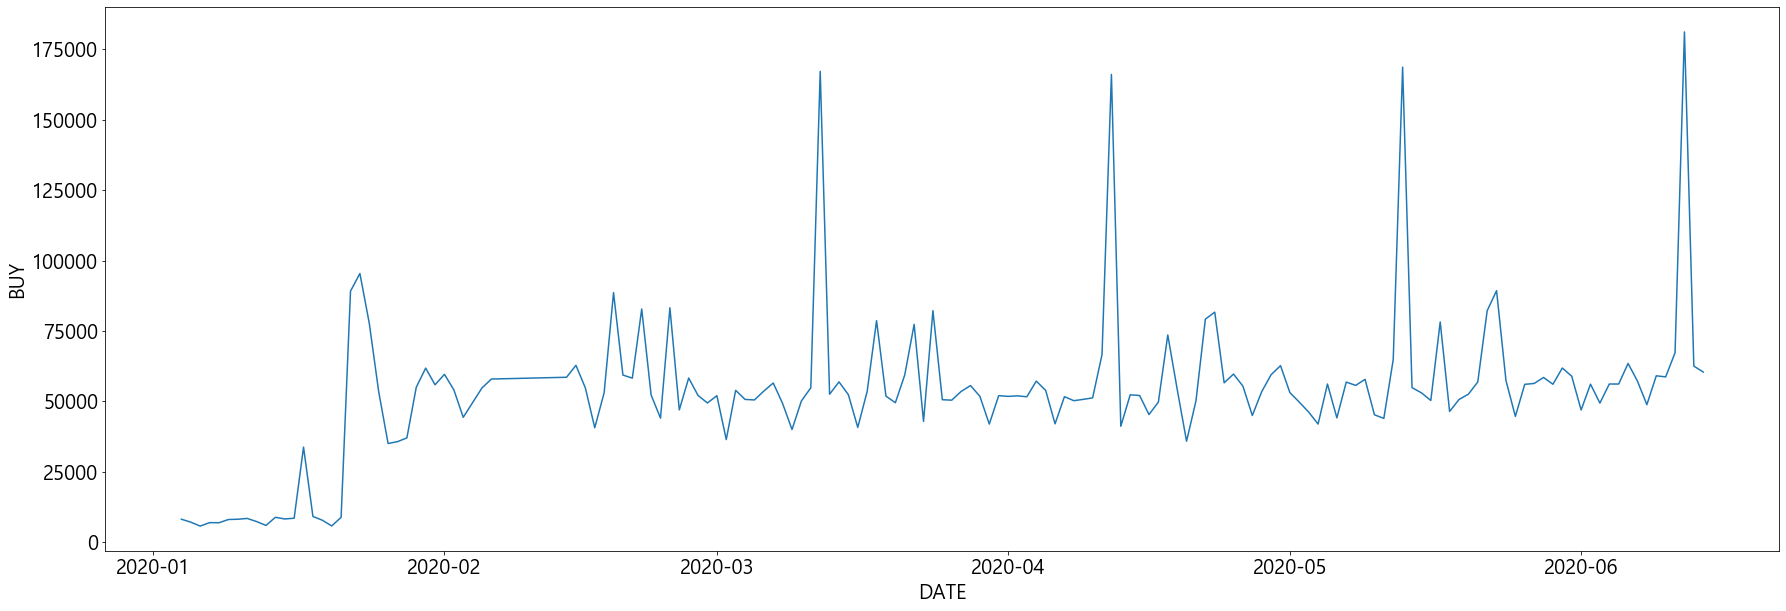

In [33]:
con1 = df_mod5['mrhst_induty_cl_code']//100 == 30 #'일반 가구', '기타가구', '철제 가구'
con2 = df_mod5['mrhst_induty_cl_code']//100 == 31 #'가전 제품', '기타전기제품', '냉열 기기'
con3 = df_mod5['mrhst_induty_cl_code']//100 == 32 #'주방 용구', '주방용식기', '정 수 기', '기타주방용구'
con4 = df_mod5['mrhst_induty_cl_code']//100 == 33 #'주 유 소', 'L P G', '유류 판매', '기타연료', '전기차충전소'
con5 = df_mod5['mrhst_induty_cl_code']//100 == 34 #'사진관', '카 메 라', '기타광학품'
df3 = df_mod5[con1|con2|con3|con4|con5]
buy_graph(df3)

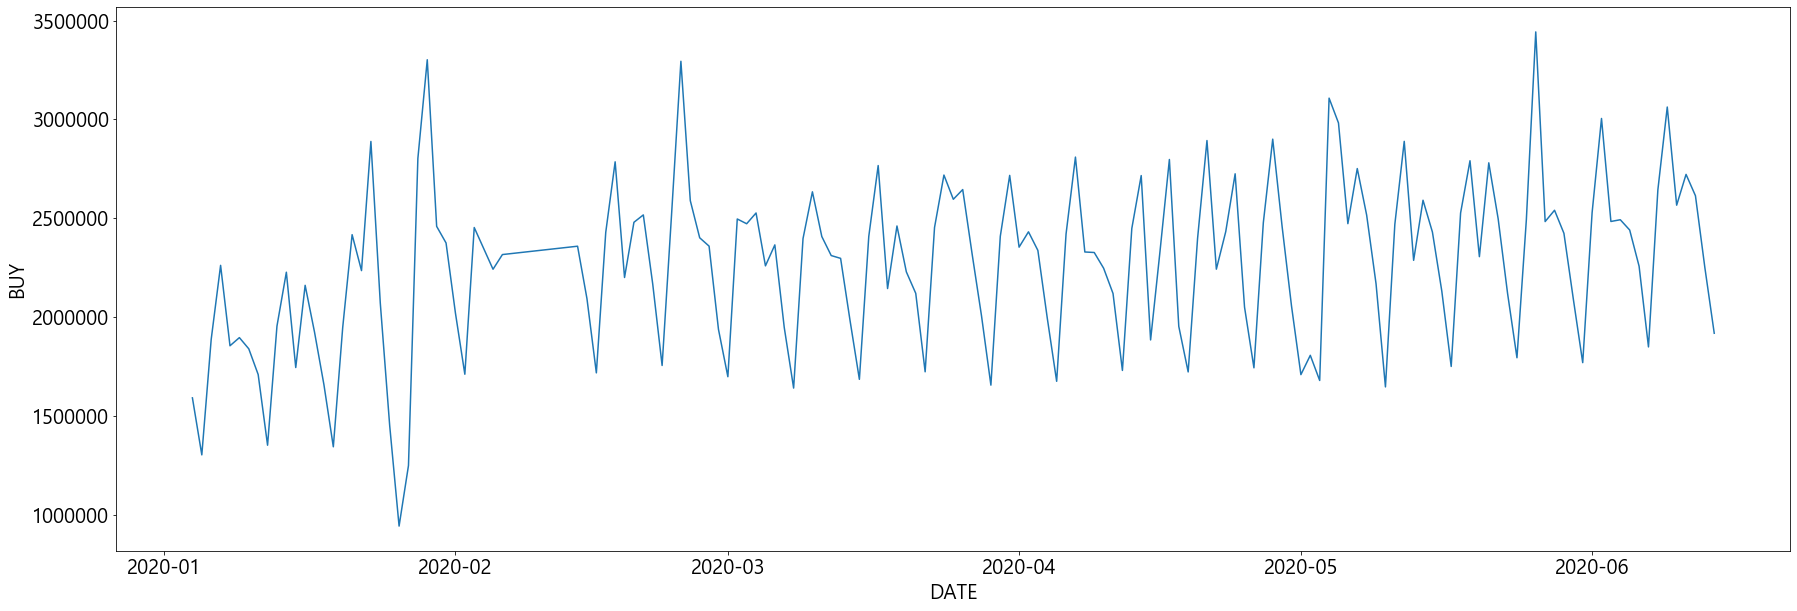

In [34]:
con1 = df_mod5['mrhst_induty_cl_code']//100 == 40 #'편 의 점', '슈퍼 마켓', '대형할인점', '기타유통업', '상품권', '인터넷종합Mall', '자사카드발행백화점','상품권 전문판매', '인터넷Mall'
con2 = df_mod5['mrhst_induty_cl_code']//100 == 41 #'농', '구내매점(국가기관등)', '공무원연금매점', '기타비영리유통'
con3 = df_mod5['mrhst_induty_cl_code']//100 == 42 #'정장', '내의판매점', '기타의류', '스포츠의류', '아동의류', '맞춤복 점', '단체복', '와이셔츠/타이',   '양 품 점', '캐쥬얼의류'
con4 = df_mod5['mrhst_induty_cl_code']//100 == 43 #'침구수예점', '카페트', '옷감 직물', '기타직물', '혼수전문점'
con5 = df_mod5['mrhst_induty_cl_code']//100 == 44 #'기타잡화', '악세 사리', '신   발', '시   계', '가   방', '귀 금 속', '제 화 점', '기념품 점',  '성인용품점'
df4 = df_mod5[con1|con2|con3|con4|con5]
buy_graph(df4)

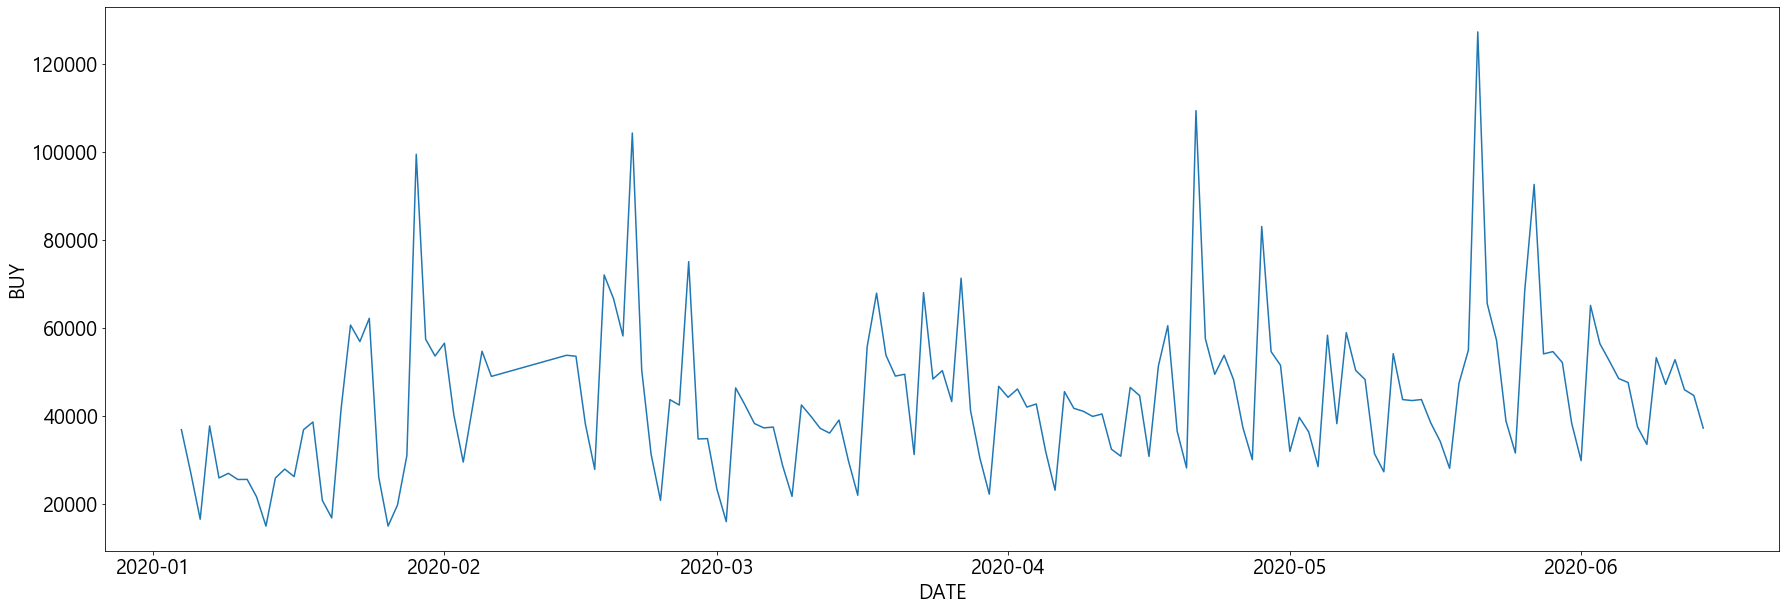

In [35]:
con1 = df_mod5['mrhst_induty_cl_code']//100 == 50 #'문구용 품', '일반 서적', '출판인쇄물', '완 구 점', '과학기자재', '전문 서적', '기타서적문구', '정기간행물', '교육테이프'
con2 = df_mod5['mrhst_induty_cl_code']//100 == 51 #'유아원', '보습학원', '예체능학원', '독서실', '기타 교육', '외국어학원', '기능학원', '초중고교육기관',  '컴퓨터학원', '학습지교육'
con3 = df_mod5['mrhst_induty_cl_code']//100 == 52 #'통신 기기', '컴 퓨 터', '기타사무용품', '사무 기기', '전자(상우회)', '통신기기무이자할부'
df5 = df_mod5[con1|con2|con3]
buy_graph(df5)

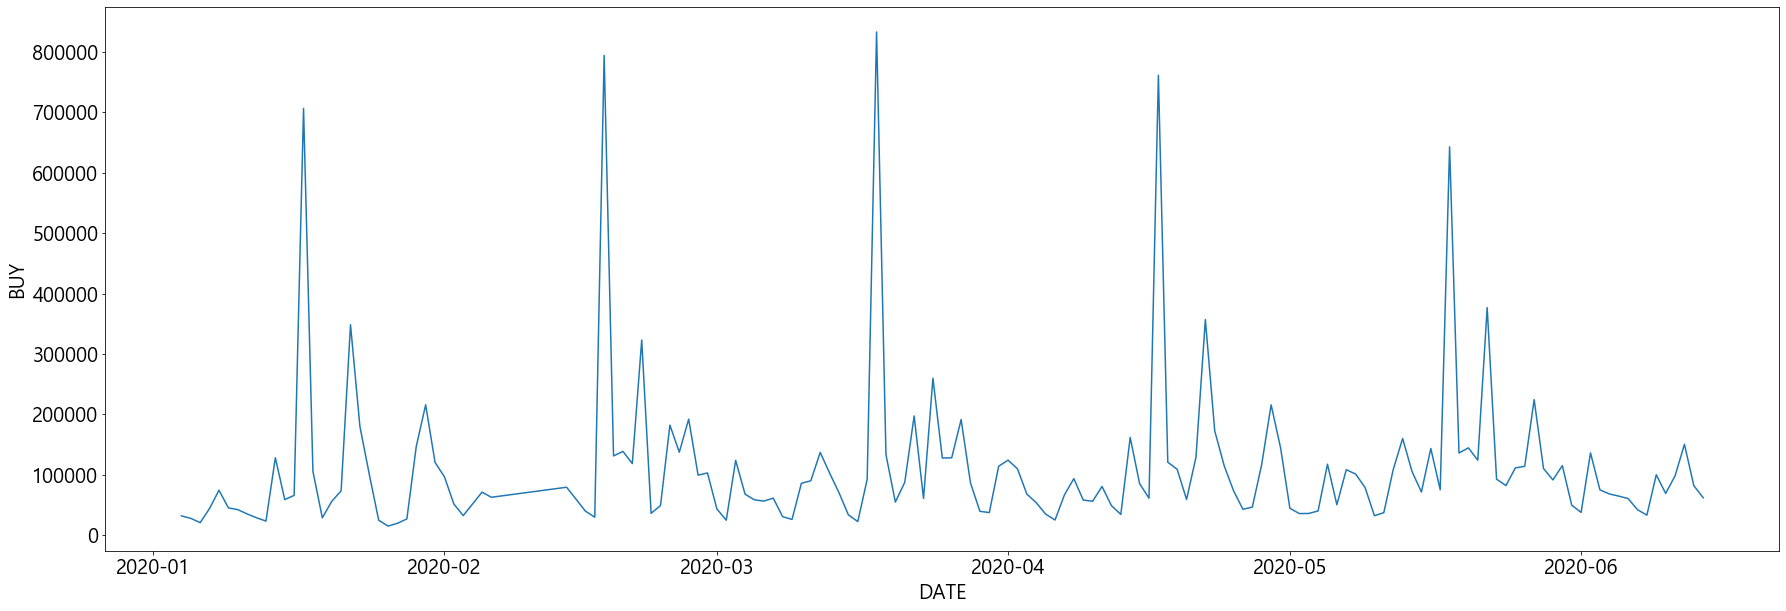

In [36]:
con1 = df_mod5['mrhst_induty_cl_code']//100 == 60 #'이륜차판매', '수입자동차', '중고자동차', '국산 신차', '기타 운송', '중고자동차위탁판매'
con2 = df_mod5['mrhst_induty_cl_code']//100 == 61 #'자동차정비', '주 차 장', '자동차부품', '세 차 장', '자동차시트/타이어', '카인테리어', '윤활유전문판매',  '기타자동차서비스', '국산신차직영부품/정비업소'
con3 = df_mod5['mrhst_induty_cl_code']//100 == 62 #'손해 보험', '기타보험', '생명 보험'
df6 = df_mod5[con1|con2|con3]
buy_graph(df6)

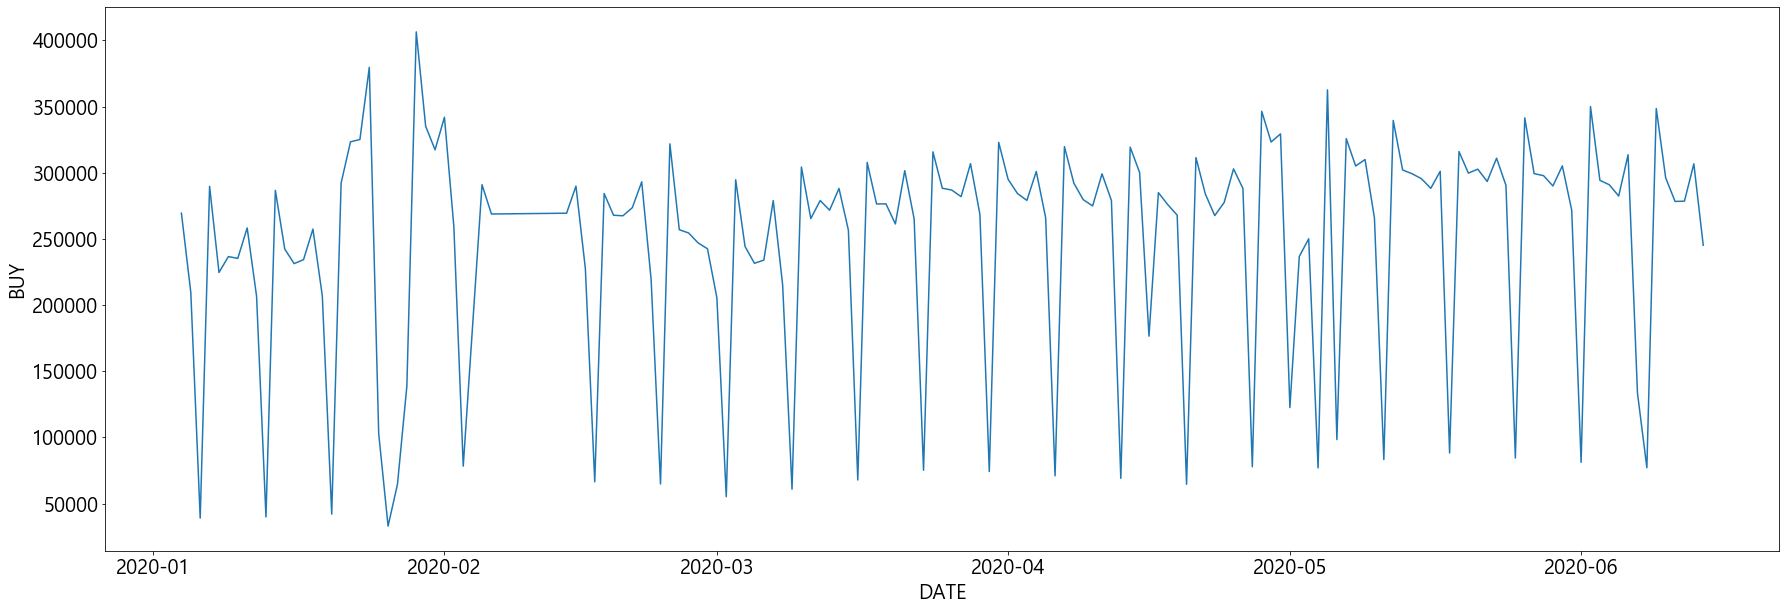

In [37]:
con1 = df_mod5['mrhst_induty_cl_code']//100 == 70 #'약국', '의원', '한의원', '치과의원', '동물병원', '병원', '종합병원', '기타의료기관및기타의료기기', '치과병원', '제약회사', '한방병원', '산후조리원'
con2 = df_mod5['mrhst_induty_cl_code']//100 == 71 #'미 용 원', '화 장 품', '안경', '사우나', '피부미용실', '의료 용품', '기타대인서비스', '미용 재료', '안마/스포츠마사지', '이 용 원'
df7 = df_mod5[con1|con2]
buy_graph(df7)

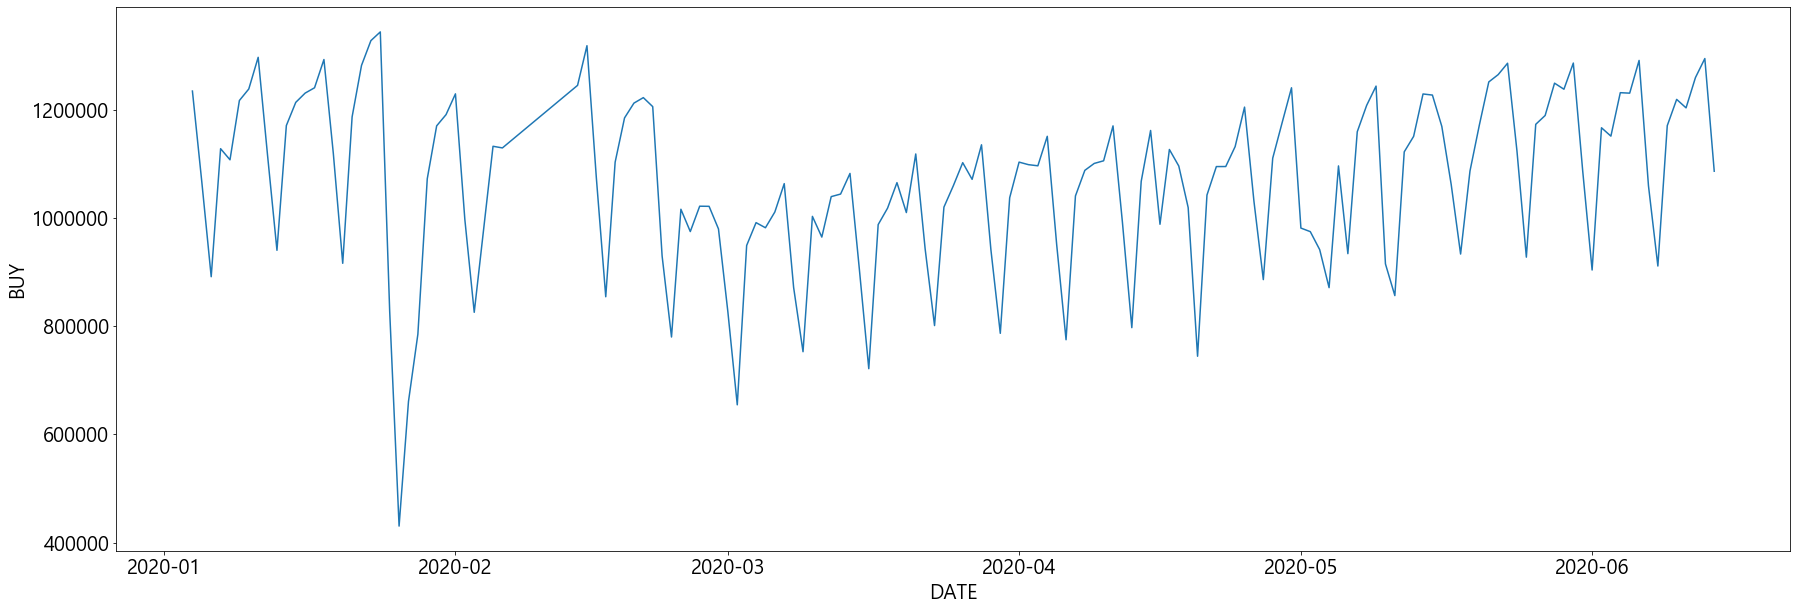

In [38]:
con1 = df_mod5['mrhst_induty_cl_code']//100 == 80 #'일반한식', '서양음식', '스넥', '주점', '중국음식', '일식회집', '칵테일바', '위탁급식업', '갈비전문점', '한정식'
con2 = df_mod5['mrhst_induty_cl_code']//100 == 81 #'유흥주점'
con3 = df_mod5['mrhst_induty_cl_code']//100 == 82 #'단란주점'
con4 = df_mod5['mrhst_induty_cl_code']//100 == 83 #'제과점', '기타음료식품', '정 육 점', '농축수산품', '미곡상', '주류판매점'
con5 = df_mod5['mrhst_induty_cl_code']//100 == 84 #'기타건강식', '홍삼 제품', '인삼 제품'
df8 = df_mod5[con1|con2|con3|con4|con5]
buy_graph(df8)

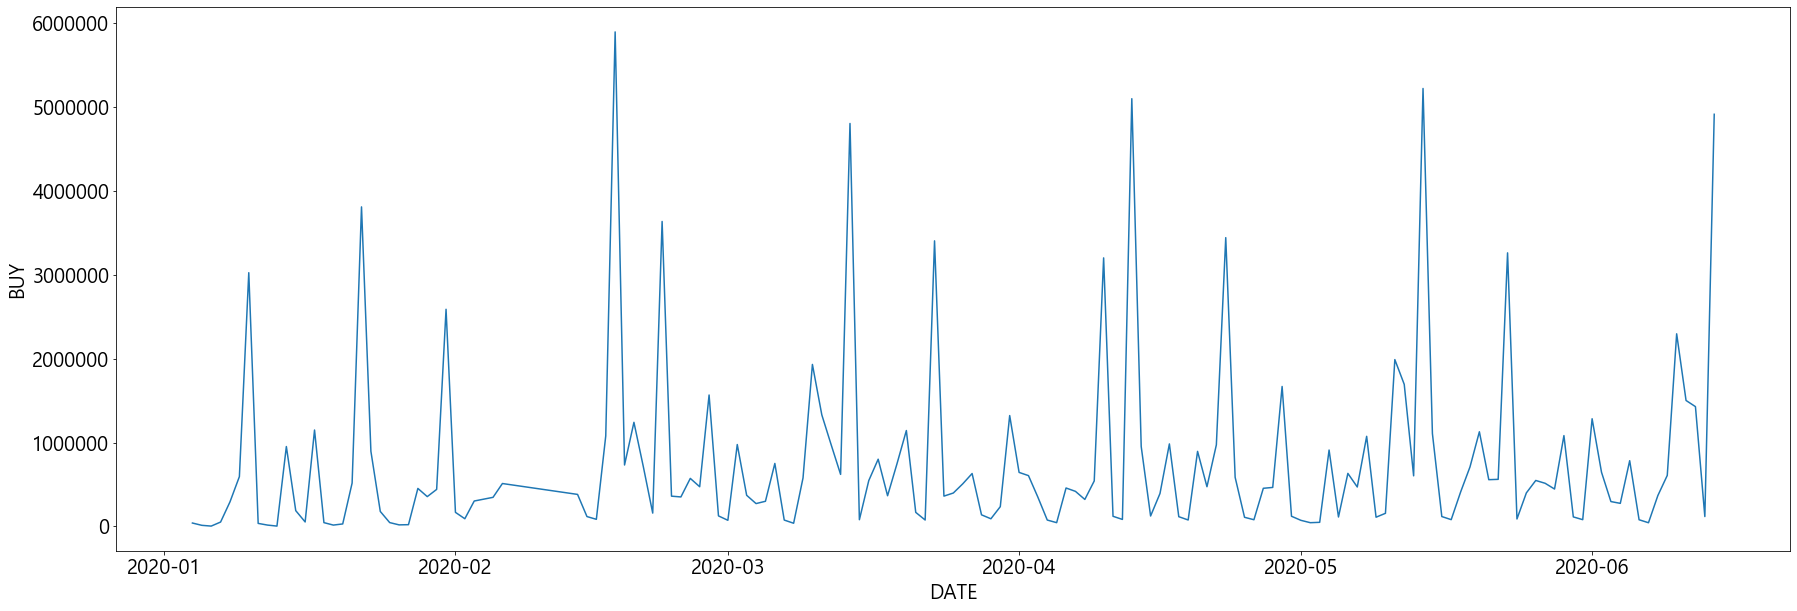

In [39]:
con1 = df_mod5['mrhst_induty_cl_code']//100 == 90 #'목재', '기타건축자재', '조명 기구', '페 인 트', '인테 리어', '보일러펌프샷시', '건축요업품', '유   리', '부동산분양'
con2 = df_mod5['mrhst_induty_cl_code']//100 == 91 #'사무서비스', '종합용역', '기타용역서비스', '화물 운송', '부동산중개/임대', '소프트웨어', '법률회계서비스(개인)', '혼례서비스', '법률회계서비스(법인)'
con3 = df_mod5['mrhst_induty_cl_code']//100 == 92 #'세탁소', '가정용품수리', '사무통신기기수리', '기타수리서비스', '신변잡화수리', '레져용품수리'
con4 = df_mod5['mrhst_induty_cl_code']//100 == 93 #'레져업소(회원제형태)', '학원(회원제형태)', '기타회원제형태업소4', '기타회원제형태업소1', '서적출판(회원제형태)', '건강식품(회원제형태)', '기타회원제형태업소3'
con5 = df_mod5['mrhst_induty_cl_code']//100 == 95 #'통신판매(일반)', '통신판매(생활서비스)'
con6 = df_mod5['mrhst_induty_cl_code']//100 == 96 #'비료/농약/사료/종자', '농기계', '기타농업관련'
con7 = df_mod5['mrhst_induty_cl_code']//100 == 99 #'기타전문점', '기계 공구', '비 영 리', '비영리/비대상', '사업자미등록개인', '외국인전용가맹점',   '비씨카드정산용(할인)', 'P2P송금'
df9 = df_mod5[con1|con2|con3|con4|con5|con6|con7]
buy_graph(df9)

# 대분류 그래프끼리 비교해보았다

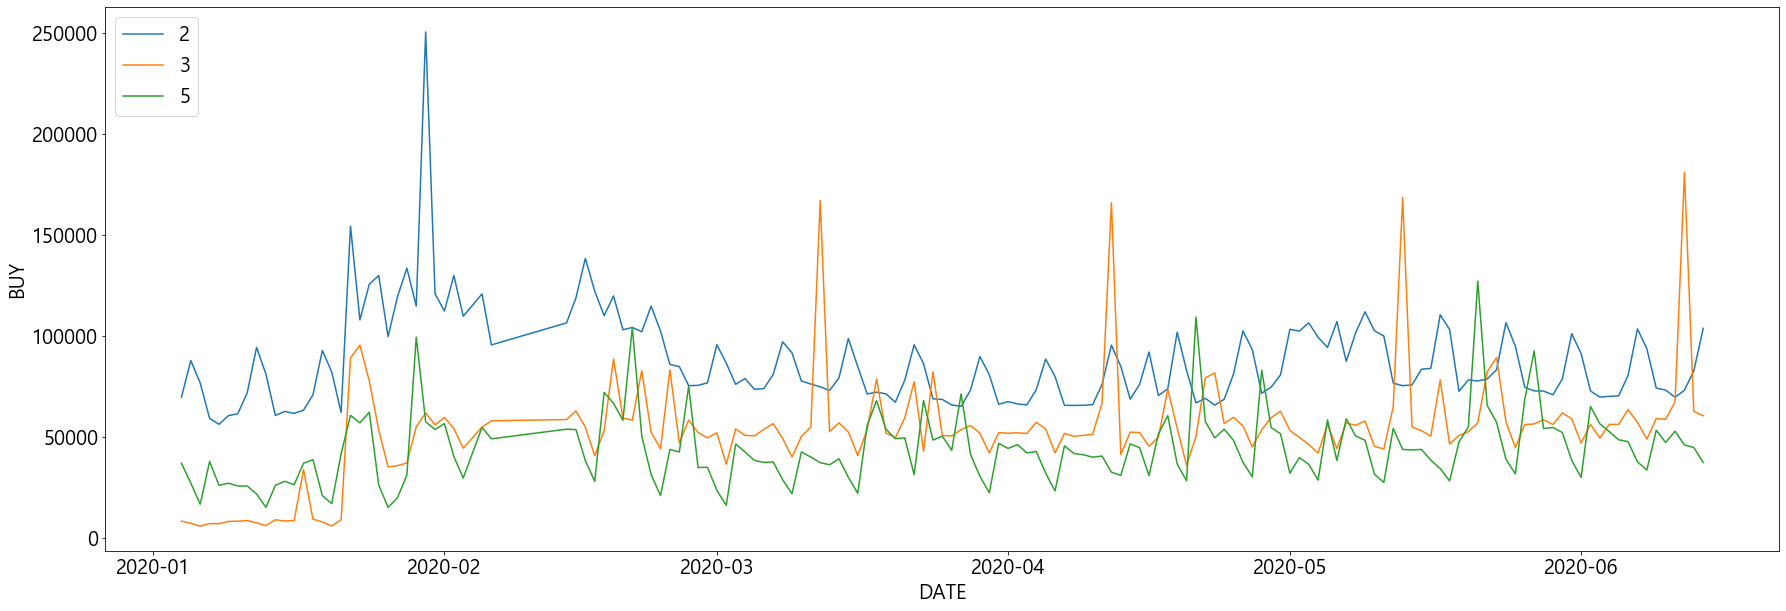

In [165]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name, size = 20)
plt.figure(figsize=(30,10))
# plt.plot(pd.DataFrame(df1['selng_cascnt_int'].groupby(df1['date']).sum()),label='1')
plt.plot(pd.DataFrame(df2['selng_cascnt_int'].groupby(df2['date']).sum()),label='2')
plt.plot(pd.DataFrame(df3['selng_cascnt_int'].groupby(df3['date']).sum()),label='3')
# plt.plot(pd.DataFrame(df4['selng_cascnt_int'].groupby(df4['date']).sum()),label='4')
plt.plot(pd.DataFrame(df5['selng_cascnt_int'].groupby(df5['date']).sum()),label='5')
# plt.plot(pd.DataFrame(df6['selng_cascnt_int'].groupby(df6['date']).sum()),label='6')
# plt.plot(pd.DataFrame(df7['selng_cascnt_int'].groupby(df7['date']).sum()),label='7')
# plt.plot(pd.DataFrame(df8['selng_cascnt_int'].groupby(df8['date']).sum()),label='8')
# plt.plot(pd.DataFrame(df9['selng_cascnt_int'].groupby(df9['date']).sum()),label='9')
plt.legend(loc='upper left')
plt.xlabel('DATE')
plt.ylabel('BUY')
plt.show()

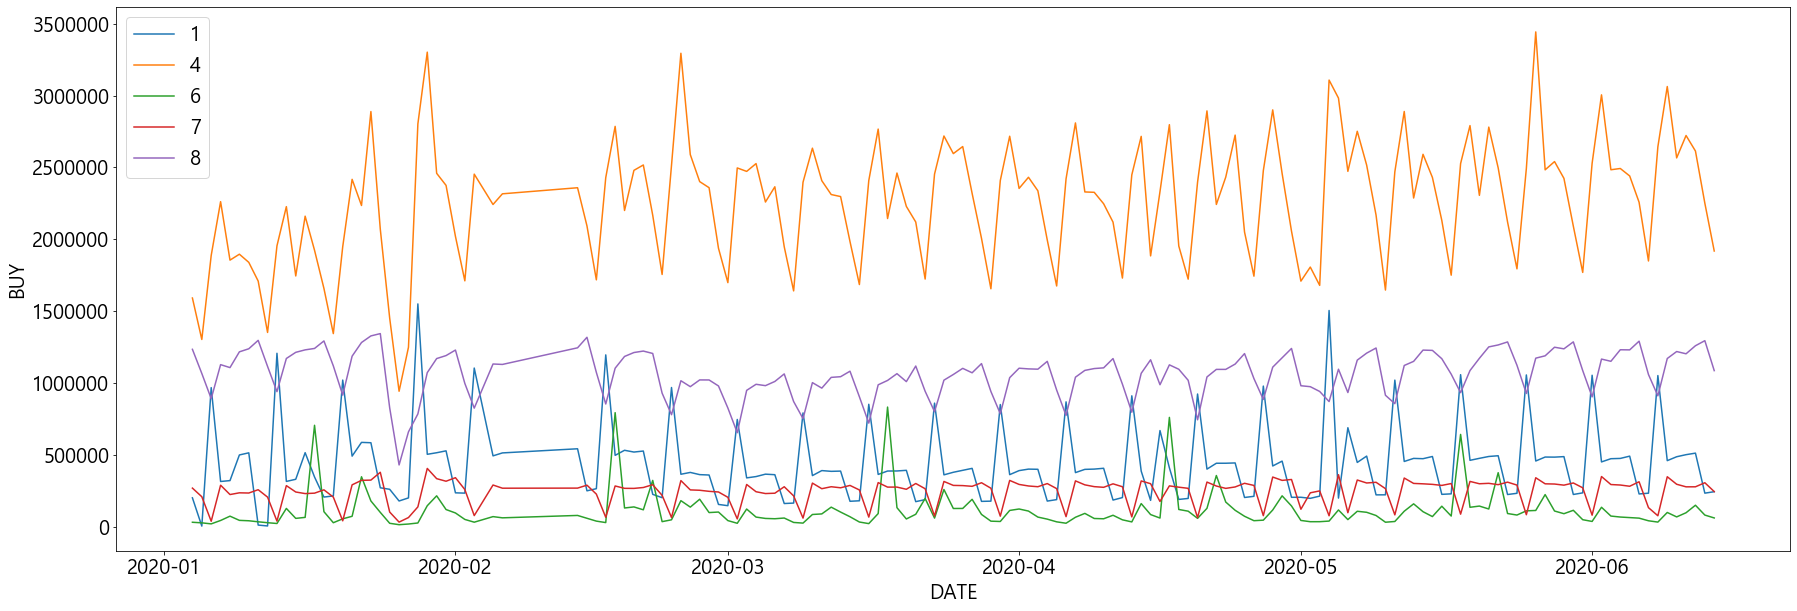

In [167]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name, size = 20)
plt.figure(figsize=(30,10))
plt.plot(pd.DataFrame(df1['selng_cascnt_int'].groupby(df1['date']).sum()),label='1')
# plt.plot(pd.DataFrame(df2['selng_cascnt_int'].groupby(df2['date']).sum()),label='2')
# plt.plot(pd.DataFrame(df3['selng_cascnt_int'].groupby(df3['date']).sum()),label='3')
plt.plot(pd.DataFrame(df4['selng_cascnt_int'].groupby(df4['date']).sum()),label='4')
# plt.plot(pd.DataFrame(df5['selng_cascnt_int'].groupby(df5['date']).sum()),label='5')
plt.plot(pd.DataFrame(df6['selng_cascnt_int'].groupby(df6['date']).sum()),label='6')
plt.plot(pd.DataFrame(df7['selng_cascnt_int'].groupby(df7['date']).sum()),label='7')
plt.plot(pd.DataFrame(df8['selng_cascnt_int'].groupby(df8['date']).sum()),label='8')
# plt.plot(pd.DataFrame(df9['selng_cascnt_int'].groupby(df9['date']).sum()),label='9')
plt.legend(loc='upper left')
plt.xlabel('DATE')
plt.ylabel('BUY')
plt.show()